### Unsupervised Learning

* We devide our dataset into supervised or unsupervised learning depending on the fact that if labelled information is given
to us or not and if we want to make use of that labelled information to make conclusions.Here, we do not have any prior 
information about the dataset. We are supposed to find patterns in our dataset using given information.Such a problem statement falls under unsupervised learning. There are different types of methods used to detect patterns in the dataset like 
centroid based clustering or non hierarchical based clustering/ Distance based clustering which consists of K-means, K-means++, Density based clustering which consists DBSCAN Clustering,Distribution based clustering, Hierarchical Clustering which consists of Aglomerative Clustering.

* Clustering algorithms have multiple applications like customer segmentation, anomly detection, image segmentation, semi-supervised learning, for dimensionality reduction, data analysis etc.

### Exploratory Data Analysis

In [153]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [5]:
#loading the data
df = pd.read_csv(r"https://raw.githubusercontent.com/NelakurthiSudheer/Mall-Customers-Segmentation/main/Dataset/Mall_Customers.csv")

### DataSet Overview

### Business Problem

### STATISTICAL ANALYSIS

In [6]:
#checking the first 10 rows of data
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
#checking statistics of data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
#check no of unique values in each column
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [22]:
#check no of rows and columns 
df.shape

(200, 5)

In [25]:
#check null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### GRAPHICAL ANALYSIS

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

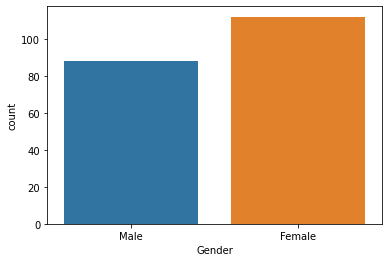

In [33]:
#check count of male Vs females
import seaborn as sns
sns.countplot(df['Gender'])

The Mall has more number of Female Customers

Text(0.5, 1.0, "Distribution of Customer's Age (Yrs)")

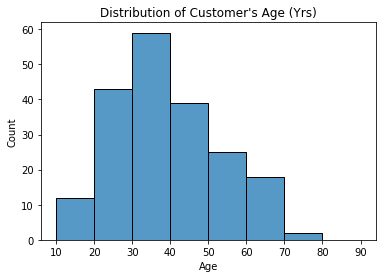

In [96]:
# Age Distribution plot
sns.histplot(data=df, x="Age", bins = list(range(10, 100, 10)))
plt.title("Distribution of Customer's Age (Yrs)")

There are more customers <45 years of age. The Distribution of Age variable is Right-Skewed.

Text(0.5, 1.0, "Distribution of Customer's Annual Income(k$)")

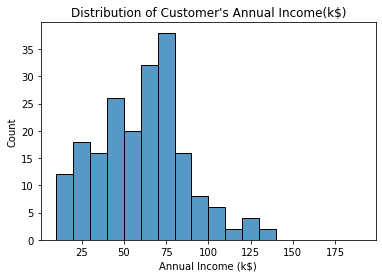

In [45]:
# Annual Income Distribution plot
sns.histplot(data=df, x="Annual Income (k$)", bins = list(range(10, 200, 10)))
plt.title("Distribution of Customer's Annual Income(k$)")

The Distribution of Customers Annual Income variable is also Right-Skewed. Most customers have income in the range 50k - 80k.

Text(0.5, 1.0, "Distribution of Customer's Spending Score (1-100)")

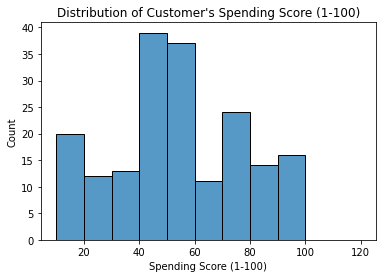

In [50]:
# Spending Dist Score Distribution plot
sns.histplot(data=df, x=" ", bins = list(range(10, 130, 10)))
plt.title("Distribution of Customer's Spending Score (1-100)")

Spending Score Variable has normal distribution. Both high-spending and low-spending is equally spread at both the ends.

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>

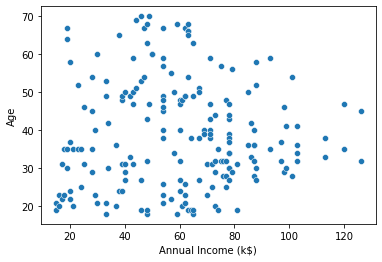

In [174]:
# Relationship between Age and Annual Income

sns.scatterplot(data=df, x="Annual Income (k$)",
                 y="Age"
                )


<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

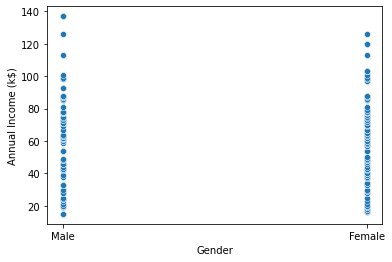

In [85]:
# Relationship between Gender and Annual Income

sns.scatterplot(data=df, x="Gender",
                 y="Annual Income (k$)")

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

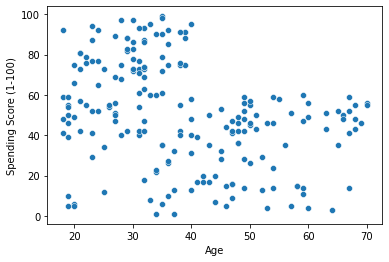

In [83]:
# Relationship between Age and Spending Score

sns.scatterplot(data=df, x="Age",
                 y="Spending Score (1-100)")

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

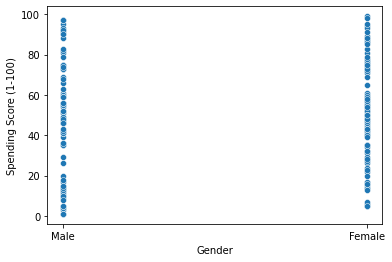

In [82]:
# Relationship between Gender and Spending Score

sns.scatterplot(data=df, x="Gender",
                 y="Spending Score (1-100)")
                

<AxesSubplot:>

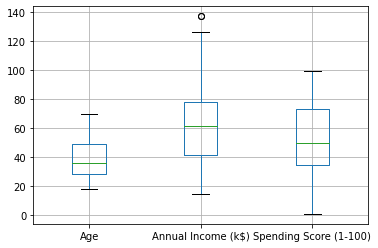

In [68]:
df.boxplot(column=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

#### REMOVING OUTLIERS

In [87]:
# Importing
import sklearn

''' Detection '''
# IQR
Q1 = np.percentile(df['Annual Income (k$)'], 25,interpolation = 'midpoint')

Q3 = np.percentile(df['Annual Income (k$)'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['Annual Income (k$)'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Annual Income (k$)'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df)


Old Shape:  (200, 5)
New Shape:       CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
193         194  Female   38                 113                      91
194         195  Female   47                 120                      16
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74

[198 rows x 5 columns]


In [537]:
df.shape

(198, 7)

#### CATEGORICAL TO NUMERICAL CONVERSION

In [100]:
#Converting gender column to numerical column
df = pd.get_dummies(df, columns=['Gender'])

In [109]:
#Dropping CustomerID Column
df.drop(['CustomerID'], axis=1)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
193,38,113,91,1,0
194,47,120,16,1,0
195,35,120,79,1,0
196,45,126,28,1,0


#### STANDARD SCALING 

In [538]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df)

In [539]:
df_scaled

array([[-1.72332506, -1.42541358, -1.77917141, ..., -1.1411948 ,
         1.1411948 ,  0.42262653],
       [-1.70582937, -1.2823665 , -1.77917141, ..., -1.1411948 ,
         1.1411948 ,  1.01192269],
       [-1.68833368, -1.35389004, -1.73944701, ...,  0.87627458,
        -0.87627458,  0.42262653],
       ...,
       [ 1.68833368, -0.28103694,  2.39189012, ...,  0.87627458,
        -0.87627458,  1.60121884],
       [ 1.70582937,  0.43419846,  2.63023649, ...,  0.87627458,
        -0.87627458, -1.34526193],
       [ 1.72332506, -0.49560756,  2.63023649, ..., -1.1411948 ,
         1.1411948 ,  1.60121884]])

### Non-Hierarchical / Distance/ Centroid Based Clustering
#### K-MEANS IMPLEMENTATION

In [182]:
# Finding the optimal No of Clusters for K-Means implementation using WCSS (inertia method)

#### ADVANTAGES

1. It can be scaled to large datasets
2. Simple to implement

#### DISADVANTAGES

 1. It requires to sepcify the number of clusters in advance
 2. It cannot handle noisy data and outliers
 3. It is not suitable to identify non-convex shapes

In [540]:
error = []

The Elbow method runs k-means clustering on dataset for a range of values between 1 to 11. Then for each value of k computes an average score for all clusters. 

In [541]:

for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    error.append(model.inertia_)


D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



<AxesSubplot:title={'center':'The Elbow Method'}, xlabel='k', ylabel='Error of Cluster'>

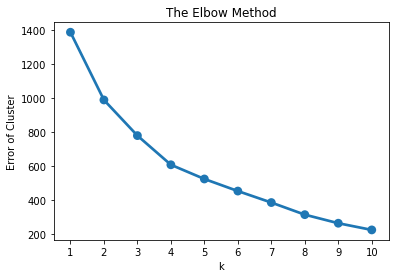

In [542]:
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('Error of Cluster')
sns.pointplot(x=list(range(1, 11)), y=error)

In [543]:
error_kmeans = []

In [544]:
for k in range(1, 11):
    model = KMeans(n_clusters=k, init = 'k-means++', random_state=42)
    model.fit(df_scaled)
    error_kmeans.append(model.inertia_)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



<AxesSubplot:title={'center':'The Elbow Method'}, xlabel='k', ylabel='Error of Cluster'>

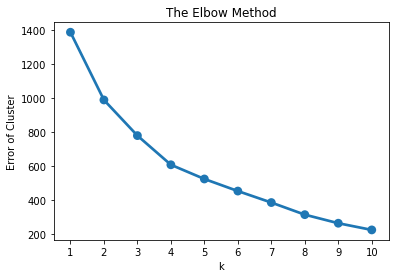

In [545]:
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('Error of Cluster')
sns.pointplot(x=list(range(1, 11)), y=error_kmeans)

#### Apply K=3,4,5,6 

In [546]:
model = KMeans(n_clusters = 3, random_state=42)
model.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

In [547]:
model.labels_

array([0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0,
       2, 2, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1])

In [548]:
df = df.assign(ClusterLabel = model.labels_)

In [549]:
df.groupby("ClusterLabel")[["Age","Annual Income (k$)","Spending Score (1-100)","Gender_Female","Gender_Male"]].mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
ClusterLabel,,,,,
0,41.500000,55.305556,41.722222,0.000000,1.000000
1,32.333333,87.424242,82.757576,0.575758,0.424242
2,39.279570,53.451613,45.204301,1.000000,0.000000


In [550]:
silhouette_score(df, model.labels_, metric='euclidean')

0.05974495394814776

In [564]:
model = KMeans(n_clusters = 4, random_state=42)
model.fit(df_scaled)

KMeans(n_clusters=4, random_state=42)

In [565]:
df = df.assign(ClusterLabel = model.labels_)

In [566]:
df.groupby("ClusterLabel")[["Age","Annual Income (k$)","Spending Score (1-100)","Gender_Female","Gender_Male"]].mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
ClusterLabel,,,,,
0,32.333333,87.424242,82.757576,0.575758,0.424242
1,42.092593,46.055556,51.407407,0.000000,1.000000
2,38.389610,45.584416,49.870130,1.000000,0.000000
3,41.529412,86.941176,17.411765,0.470588,0.529412


In [567]:
silhouette_score(df, model.labels_)

0.15437914498437338

In [555]:
model = KMeans(n_clusters = 5, random_state=42)
model.fit(df_scaled)

KMeans(n_clusters=5, random_state=42)

In [556]:
df = df.assign(ClusterLabel = model.labels_)

In [557]:
df.groupby("ClusterLabel")[["Age","Annual Income (k$)","Spending Score (1-100)","Gender_Female","Gender_Male"]].mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
ClusterLabel,,,,,
0,46.113636,50.909091,46.318182,0.000000,1.000000
1,41.174603,50.142857,43.698413,1.000000,0.000000
2,25.250000,24.916667,76.041667,0.583333,0.416667
3,32.333333,87.424242,82.757576,0.575758,0.424242
4,41.529412,86.941176,17.411765,0.470588,0.529412


In [558]:
silhouette_score(df, model.labels_, metric='euclidean')

0.22214152287079997

In [559]:
model = KMeans(n_clusters = 6, random_state=42)
model.fit(df_scaled)

KMeans(n_clusters=6, random_state=42)

In [560]:
df = df.assign(ClusterLabel = model.labels_)

In [561]:
df.groupby("ClusterLabel")[["Age","Annual Income (k$)","Spending Score (1-100)","Gender_Female","Gender_Male"]].mean().round()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
ClusterLabel,,,,,
0,32.0,87.0,83.0,1.0,0.0
1,42.0,67.0,43.0,1.0,0.0
2,34.0,29.0,50.0,1.0,0.0
3,40.0,82.0,14.0,0.0,1.0
4,58.0,48.0,41.0,0.0,1.0
5,27.0,43.0,62.0,0.0,1.0


In [562]:
silhouette_score(df, model.labels_, metric='euclidean')

0.0853073303470764

D:\Anaconda\lib\site-packages\seaborn\regression.py:592: UserWarning:

legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.



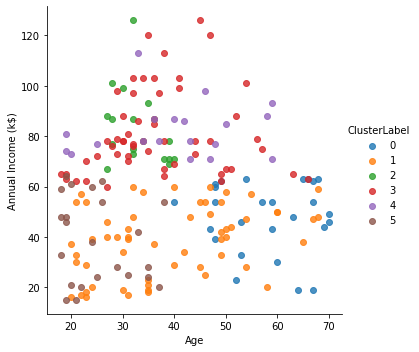

In [280]:
facet = sns.lmplot(data=df, x='Age', y='Annual Income (k$)', hue='ClusterLabel', 
                   fit_reg=False, legend=True, legend_out=True)


D:\Anaconda\lib\site-packages\seaborn\regression.py:592: UserWarning:

legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.



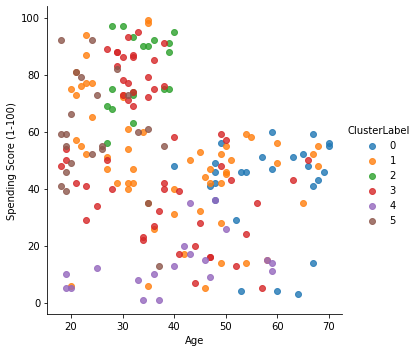

In [281]:
facet = sns.lmplot(data=df, x='Age', y='Spending Score (1-100)', hue='ClusterLabel', 
                   fit_reg=False, legend=True, legend_out=True)


From above plot we can se that our model has not separated clusters efficiently. The same can is visible in Silhouette Coefficient

# DBSCAN Clustering 
   Density Based Spatial Clsutering of Applications

DBSCAN separates the high density regions of the data from low-density areas. The no of clusters in prior do not need to be provided for this algorithm. It consides clusters as continous regions of high density. This helps us track outliers as the points in the low density regions. Hence, it is not sensitive to Outliers as K-means Clustering.

DBSCAN PARAMETERS

Epsilon : The minimum distance between two points to be termed as neighbours. 
MinPoints : This refers to the minimum number of points needed to construct a cluster.

DATA POINTS in DBSCAN

Core: This is a point from which the two parameters above are fully defined, i.e., a point with at least Minpoints within the Eps distance from itself.

Border: This is any data point that is not a core point, but it has at least one Core point within Eps distance from itself.

Noise: This is a point with less than Minpoints within distance Eps from itself. Thus, it’s not a Core or a Border.



#### ADVANTAGES:

1. DBSCAN is able to find clusters in arbitarily shaped data
2. DBSCAN is able to identify noise in dataset

#### DISADVANTAGES

1. Does not work well in high dimensional data

In [568]:
df1 = pd.read_csv(r"https://raw.githubusercontent.com/NelakurthiSudheer/Mall-Customers-Segmentation/main/Dataset/Mall_Customers.csv")

In [569]:
df1.drop(['CustomerID'], axis=1, inplace=True)

In [570]:
df1 = pd.get_dummies(df1, columns=['Gender'])

In [571]:
from sklearn.cluster import DBSCAN
import numpy as np

In [572]:
# DBSCAN Clustering
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(df1)

DBSCAN_clustered = df1.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ 

In [573]:
y_pred = dbscan.fit_predict(df1)

In [574]:
y_pred

array([ 0,  0, -1,  0,  0,  0, -1, -1,  1,  0, -1, -1,  1,  0, -1,  0,  0,
        0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  4,  2,
        3,  2,  4,  2,  3,  2,  0,  2,  4,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2, -1,  2,  3,  2,  4,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,
       -1,  3,  2,  3, -1, -1,  2, -1, -1, -1, -1, -1, -1], dtype=int64)

In [575]:
# Assigning Cluster Labels to Dataset
df1 = df1.assign(ClusterLabel = dbscan.labels_)

In [576]:
df1.groupby("ClusterLabel")[["Age","Annual Income (k$)","Spending Score (1-100)","Gender_Female","Gender_Male"]].mean().round()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
ClusterLabel,,,,,
-1,37.0,74.0,45.0,1.0,0.0
0,39.0,48.0,52.0,1.0,0.0
1,53.0,28.0,10.0,1.0,0.0
2,33.0,82.0,83.0,1.0,0.0
3,46.0,86.0,18.0,1.0,0.0
4,21.0,76.0,8.0,0.0,1.0


Text(0.5, 1.0, 'Clusters determined by DBSCAN')

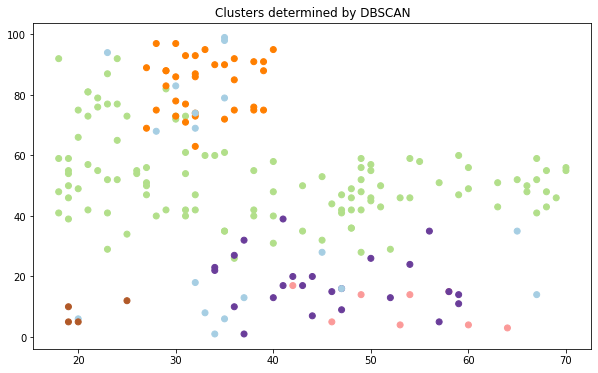

In [530]:
#Cluster Plot of Age Vs Spending Score
plt.figure(figsize=(10,6))
plt.scatter(x=df1['Age'], y=df1['Spending Score (1-100)'],c=y_pred, cmap='Paired')
plt.title("Clusters determined by DBSCAN")

In [578]:
silhouette_score(df1, dbscan.labels_)

0.25628651746128506

In [579]:
# No of Points in a Cluster
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


Observation:

-1 is assigned to the points which are considered to be Noise. Therefore we have 18 Noise Points here.

# Non-Hierarchical Clustering

Non-Hierarchical Clustering can be divided into Bottom-Up ( Aglomerative ) and Top -Down ( Decisive ) Clustering. This type of clustering does not need to enter the no of K. Instead it creates a dendogram or Tree Based Structure.

#### ADVANTAGES

1. Dendogram help us in identifying correct no of clusters

#### DISADVANTAGES

1. Outliers can cause less than optimal merging

#### Aglomerative Clustering

In [580]:
# Importing Libraries
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc


Linkage Methods

Single Linkage: Minimum Distance between instances of two considered clusters. The distance calculation can be either Euclidean or Manhattan Distance

Complete Linkage: The farthest distance between the instances of two class. 

Average Linkage: The average distance between all linkages is considered.

Centroid Linkage: The distance between the two centroid is considered.

Ward Linkage: The distance between two clusters say A and B are how much the sum of squares will increase when they both are merged. 


#### Dendogram Visualization using different linkage methods

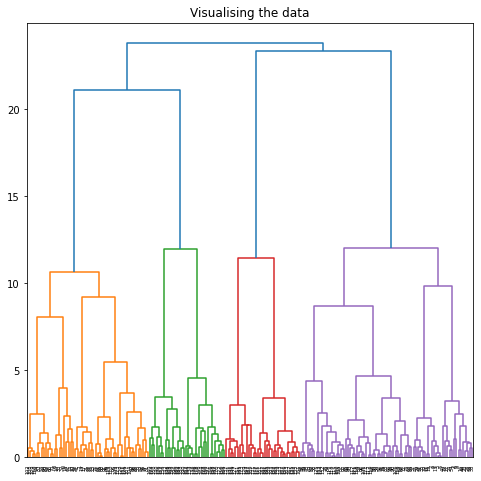

In [581]:
# WARD LINKAGE METHOD
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram_ward = shc.dendrogram((shc.linkage(df_scaled,metric='euclidean', method ='ward')))

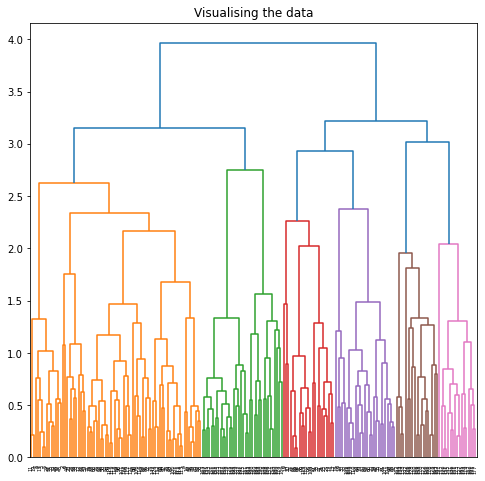

In [511]:
# AVERAGE LINKAGE METHOD
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram_average = shc.dendrogram((shc.linkage(df_scaled,metric='euclidean', method ='average')))

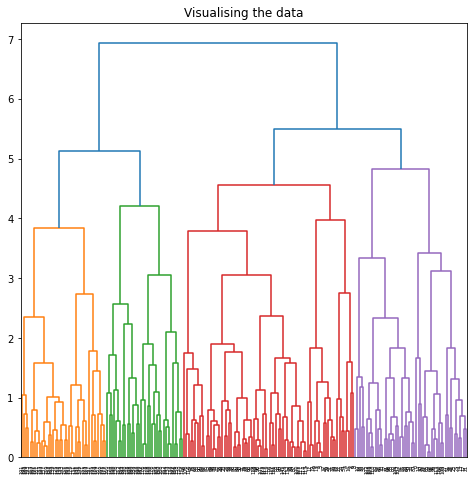

In [512]:
#COMPLETE LINKAGE METHOD
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram_complete = shc.dendrogram((shc.linkage(df_scaled, metric='euclidean',method ='complete')))

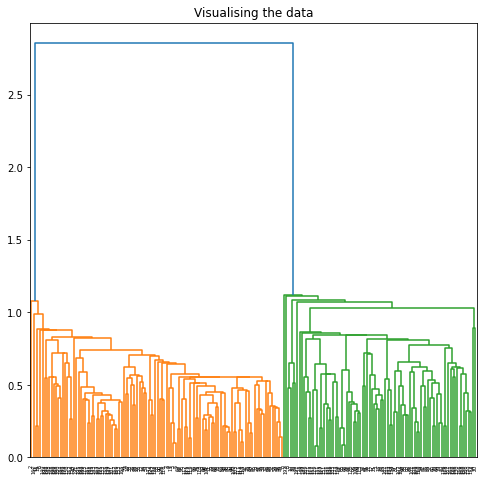

In [513]:
#SINGLE LINKAGE METHOD
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram_single = shc.dendrogram((shc.linkage(df_scaled,metric='euclidean', method ='single')))

#### Plot with 4 Clusters

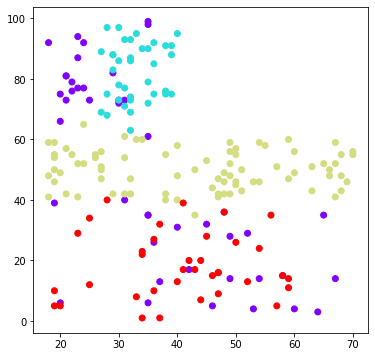

In [252]:
# AGLOMERATIVE WITH 4 CLUSTERS
ac2 = AgglomerativeClustering(n_clusters = 4)
 
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(df['Age'], df['Spending Score (1-100)'],
           c = ac2.fit_predict(df), cmap ='rainbow')
plt.show()

In [582]:
ac2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1],
      dtype=int64)

In [584]:
silhouette_score(df, ac2.labels_)

0.4188080321893158